<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/RegresionBostonHouse_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data
y = data.target

#`load_boston` has been removed from scikit-learn since version 1.2.

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


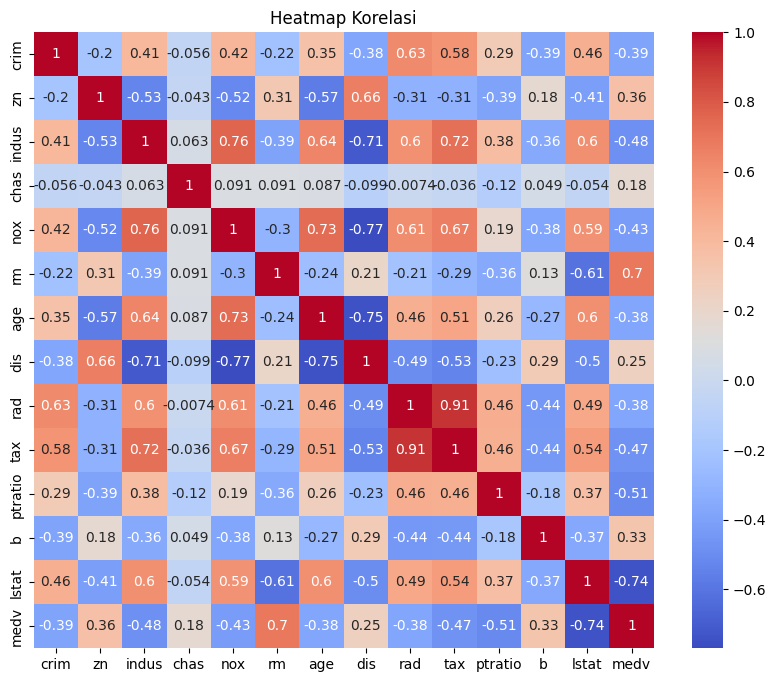

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

# Bikin heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Picture/Linear_Correlation.png" width="600" height="600">


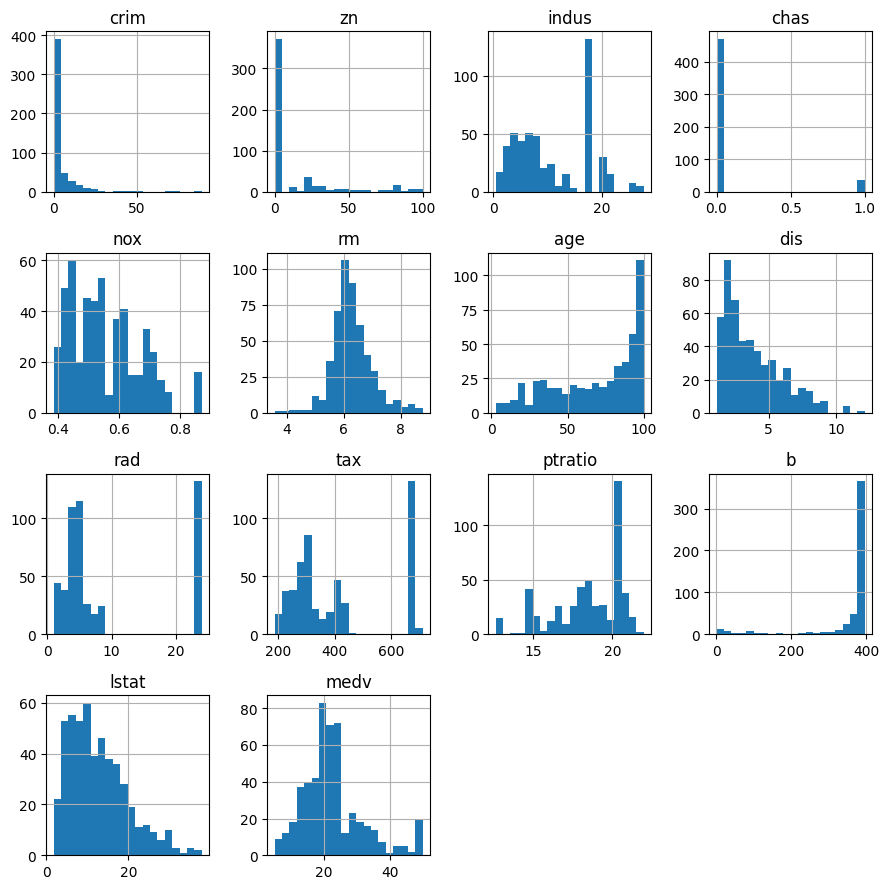

In [8]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


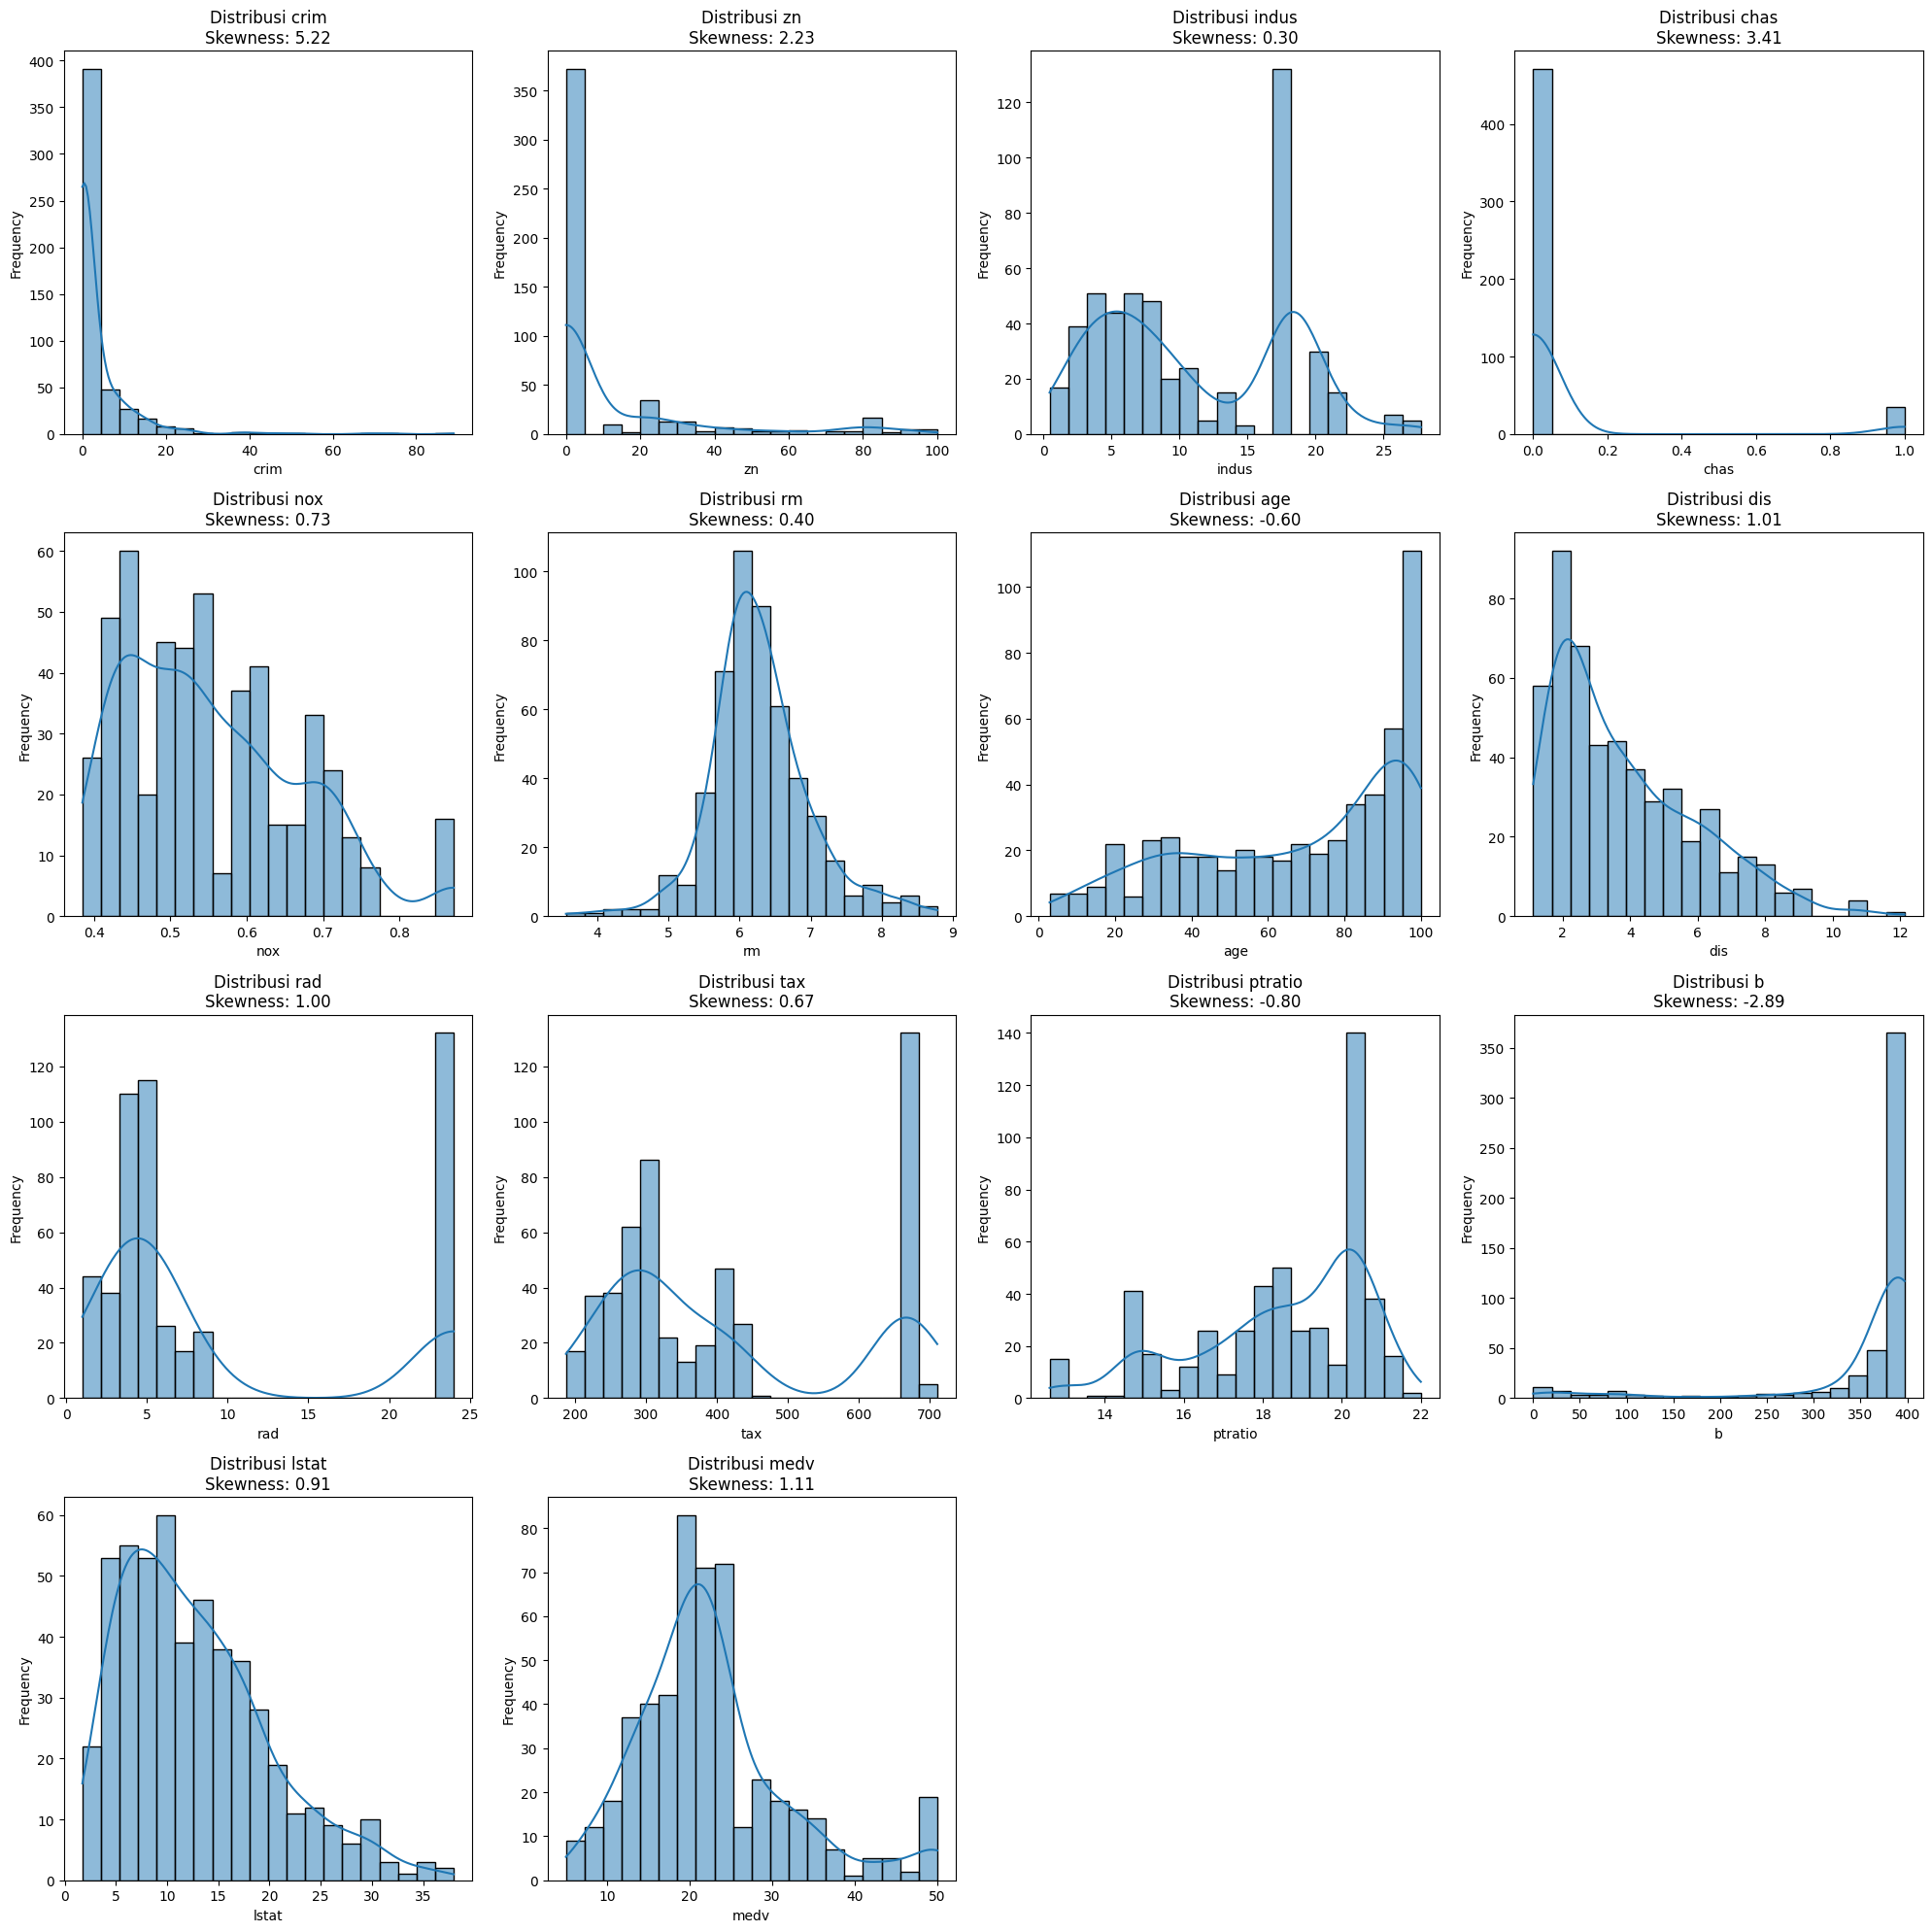

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


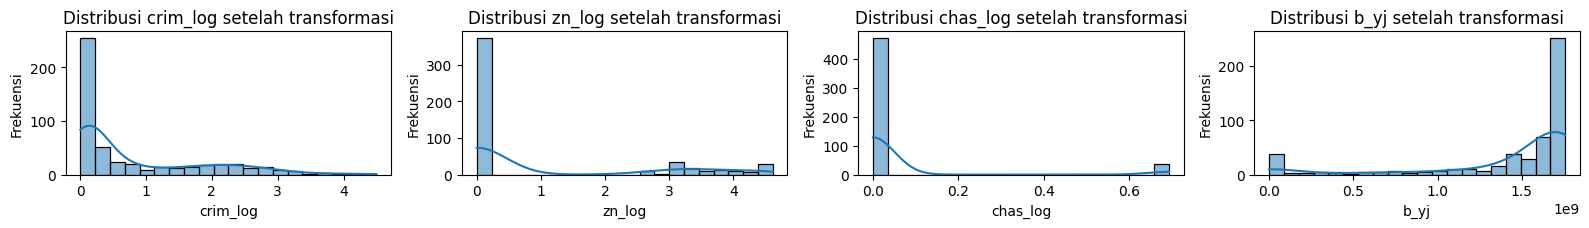

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()
transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_yj']

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460257


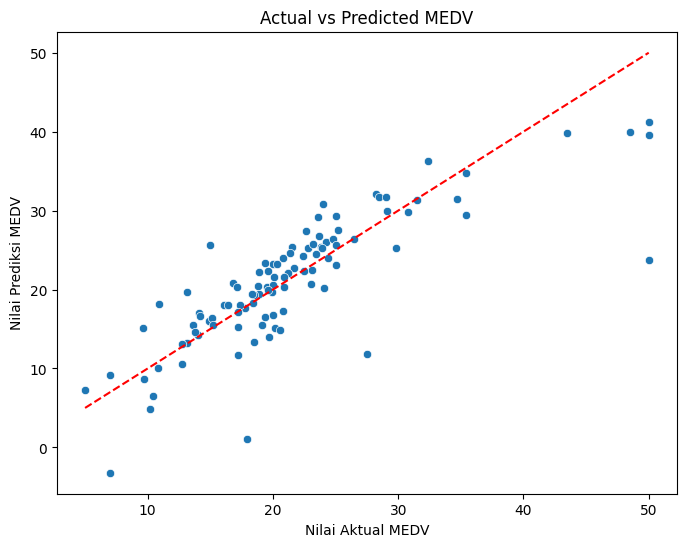

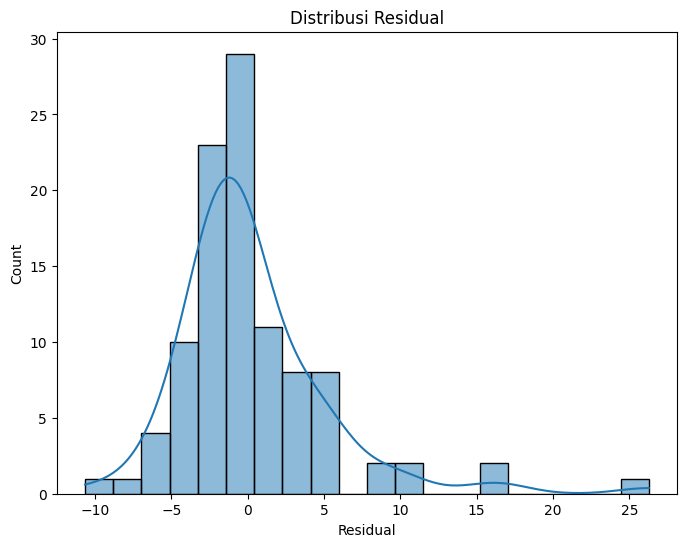

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.

# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---

#Jawaban
##1. Eksplorasi Transformasi Data
**Deskripsi:** Transformasi data digunakan untuk mengubah distribusi fitur agar lebih sesuai dengan asumsi model regresi, terutama untuk mengurangi skewness dan meningkatkan normalitas. Beberapa metode yang umum digunakan adalah:
- **Log Transform** = untuk mengubah data dengan fungsi logaritma untuk mengurangi skewness positif.
- **Box-Cox Transform** = metode yang hanya bisa digunakan pada data positif, menggunakan parameter lambda untuk mencari transformasi optimal.
- **Quantile Transform**: untuk mengubah distribusi data menjadi distribusi tertentu berdasarkan kuantil.

**Tugas:**
- Menerapkan ketiga metode transformasi pada fitur yang memiliki skewness tinggi.
- Melatih model regresi linear setelah transformasi.
- Membandingkan hasil dengan model yang menggunakan Yeo-Johnson.

**Langkah Kerja:**
1. Load Dataset & Cek Skewness


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Cek skewness tiap fitur numerik
skewed_features = df.skew().sort_values(ascending=False)
print(skewed_features)

crim       5.223149
chas       3.405904
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.403612
indus      0.295022
age       -0.598963
ptratio   -0.802325
b         -2.890374
dtype: float64


2. Menerapkan Transformasi Data

In [24]:
# Copy dataset untuk setiap transformasi
df_log = df.copy()
df_boxcox = df.copy()
df_quantile = df.copy()

# List fitur yang memiliki skewness tinggi (misal lebih dari 0.75)
high_skew_features = skewed_features[skewed_features > 0.75].index.tolist()

# Log Transform (untuk fitur dengan nilai > 0)
for feature in high_skew_features:
    if (df_log[feature] > 0).all():  # Log hanya bisa untuk nilai positif
        df_log[feature] = np.log1p(df_log[feature])

pt_yj = PowerTransformer(method='yeo-johnson')
df_boxcox[high_skew_features] = pt_yj.fit_transform(df_boxcox[high_skew_features])


# Quantile Transform (mengubah ke distribusi normal)
qt = QuantileTransformer(n_quantiles=min(500, df.shape[0]), output_distribution='normal', random_state=42)
df_quantile[high_skew_features] = qt.fit_transform(df_quantile[high_skew_features])


3. Buat Model dan Evaluasi

In [25]:
def train_and_evaluate(df_transformed, method_name):
    # Pisahkan fitur dan target
    X = df_transformed.drop(columns=["medv"])
    y = df_transformed["medv"]

    # Split data: 80% training, 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi menggunakan Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    print(f"MSE untuk {method_name}: {mse:.4f}")

# Jalankan model untuk masing-masing transformasi
train_and_evaluate(df_log, "Log Transform")
train_and_evaluate(df_boxcox, "Box-Cox Transform")
train_and_evaluate(df_quantile, "Quantile Transform")

MSE untuk Log Transform: 0.0337
MSE untuk Box-Cox Transform: 0.2284
MSE untuk Quantile Transform: 0.6560


Fitur dengan skewness tinggi: ['crim', 'chas', 'zn', 'medv', 'dis', 'rad', 'lstat', 'nox', 'tax']
⚠️ Skipping chas karena mengandung nilai 0 atau negatif.
⚠️ Skipping zn karena mengandung nilai 0 atau negatif.


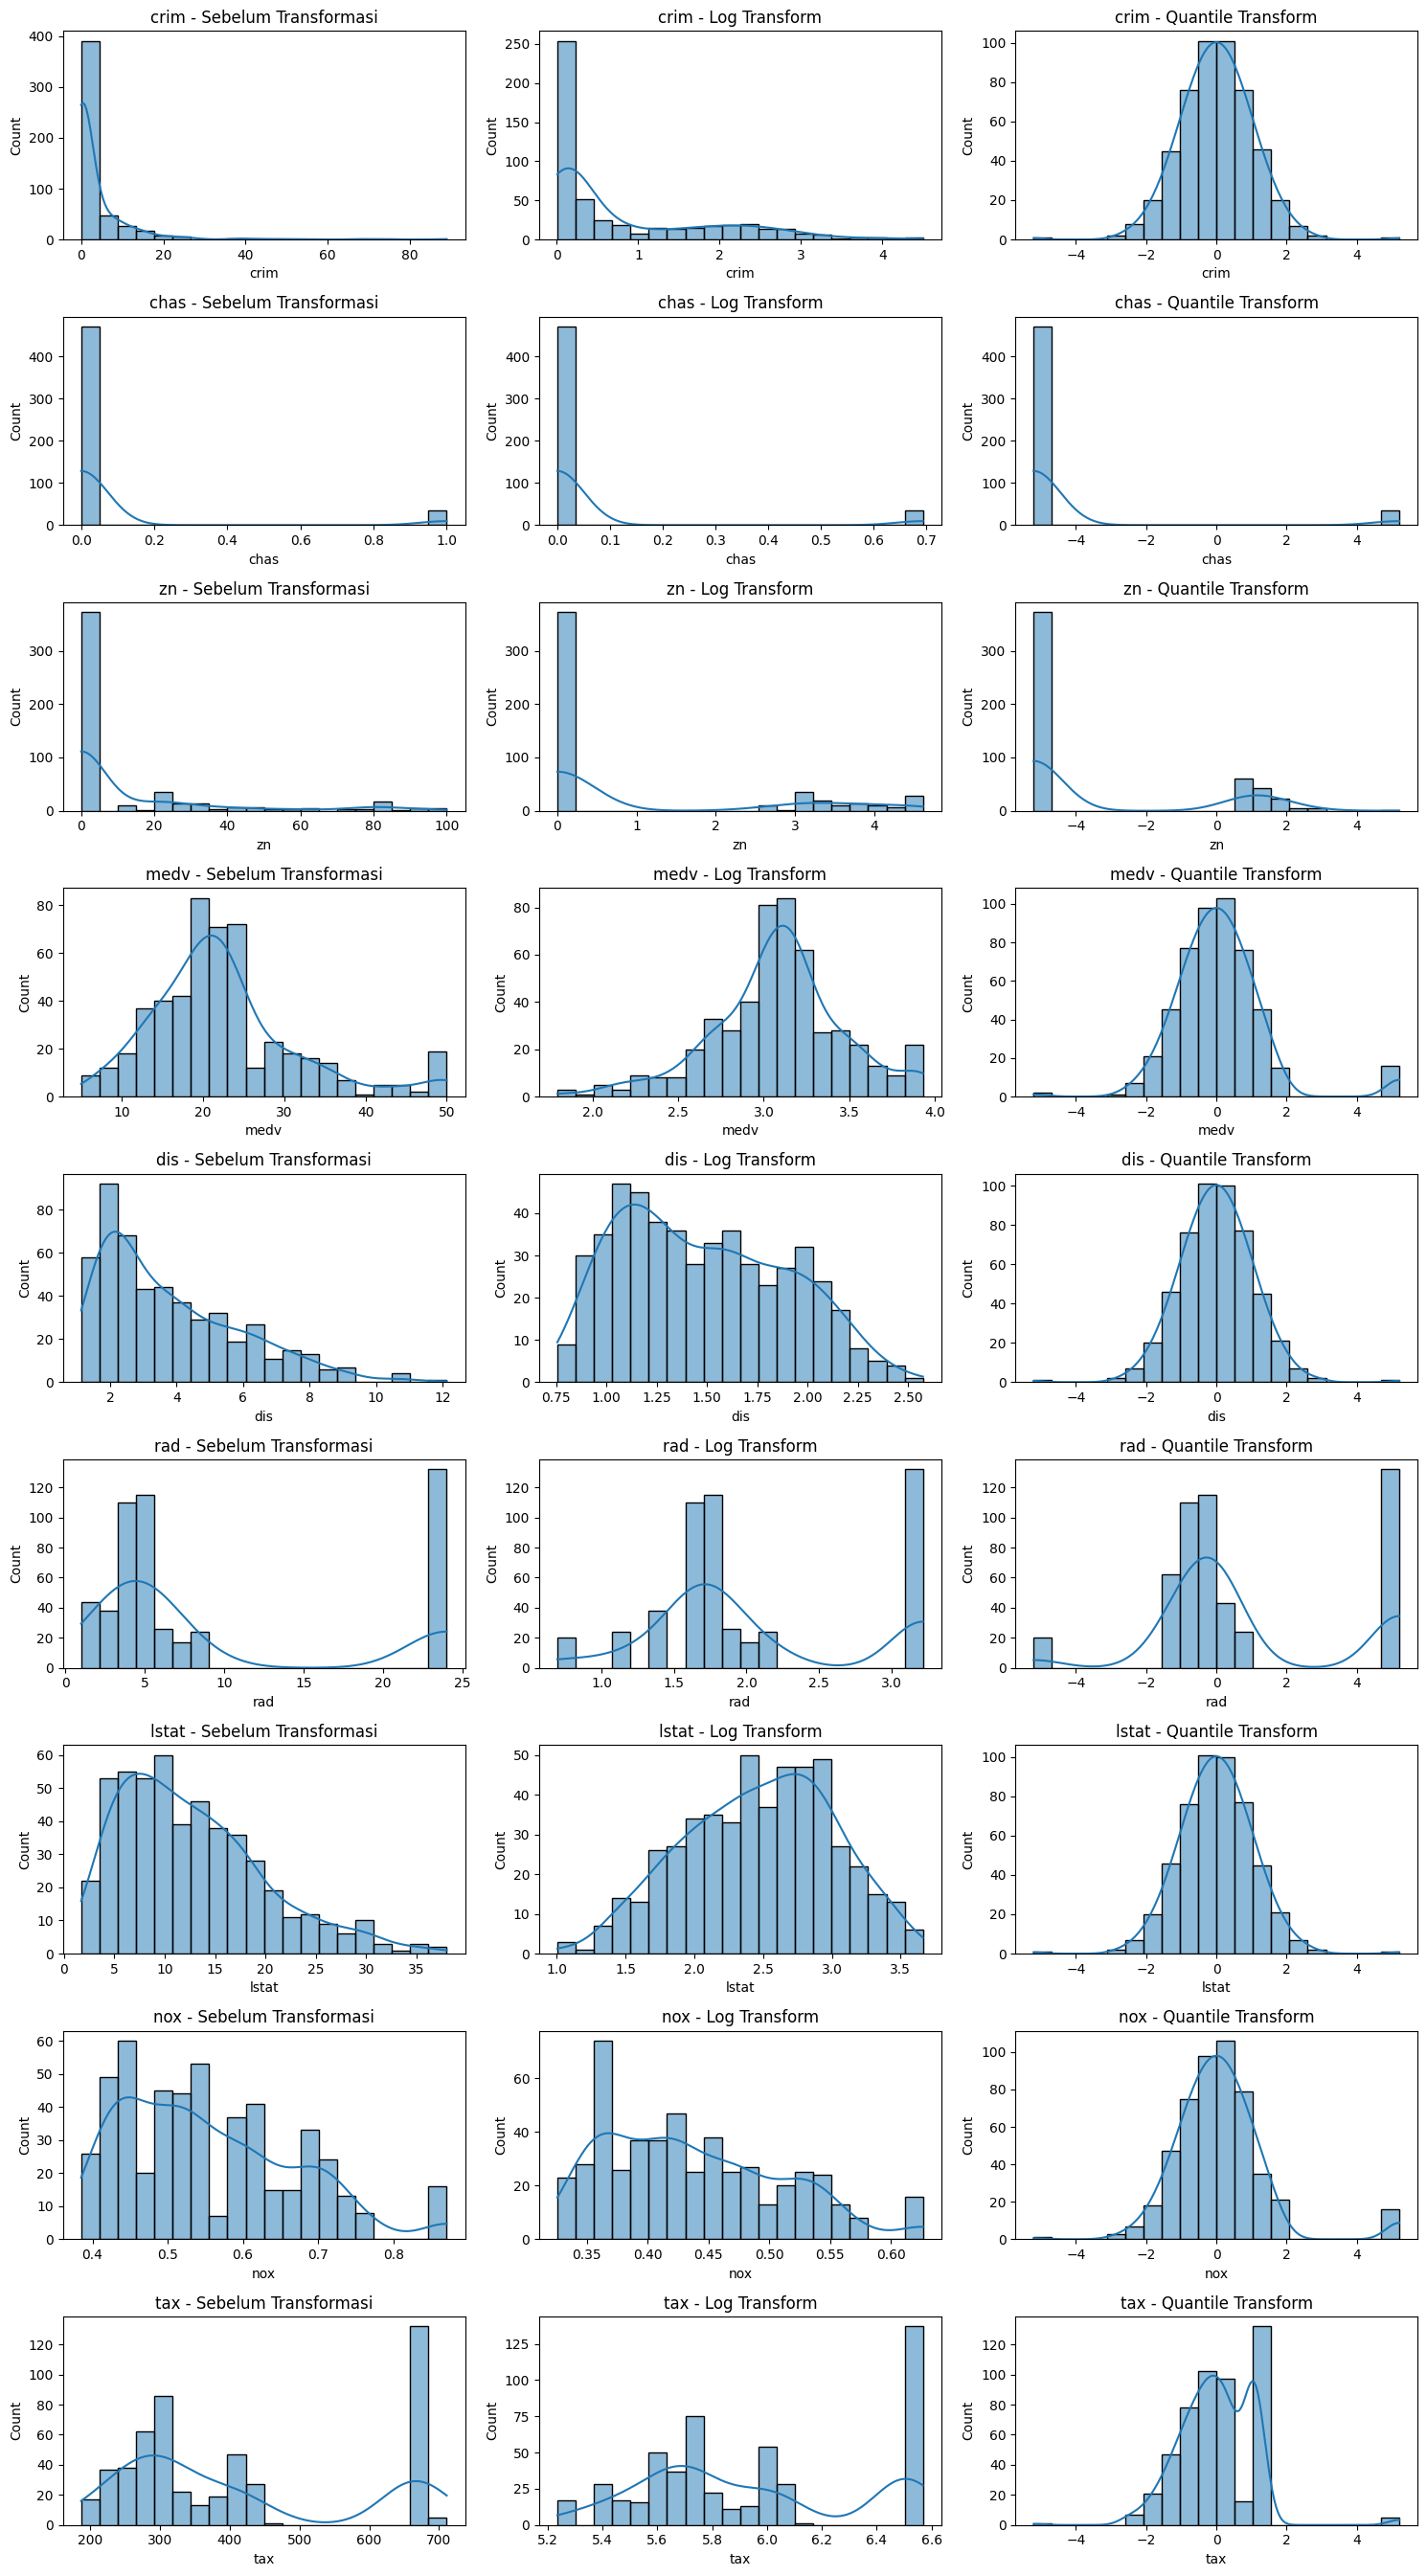

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# **1. Identifikasi fitur dengan skewness tinggi**
skewed_features = df.skew().sort_values(ascending=False)
high_skew_features = skewed_features[skewed_features > 0.5].index  # Ambil fitur yang sangat skewed
print("Fitur dengan skewness tinggi:", list(high_skew_features))

# **2. Transformasi Data**
X = df[high_skew_features].copy()  # Ambil hanya fitur yang akan ditransformasi

# **Log Transform**
X_log = np.log1p(X)

# **Box-Cox Transform (hanya untuk nilai positif)**
X_boxcox = X.copy()
pt = PowerTransformer(method='box-cox')
for feature in high_skew_features:
    if (X_boxcox[feature] > 0).all():  # Cek apakah semua nilai positif
        X_boxcox[feature] = pt.fit_transform(X_boxcox[[feature]])
    else:
        print(f"⚠️ Skipping {feature} karena mengandung nilai 0 atau negatif.")

# **Quantile Transform (ubah ke distribusi normal)**
X_quantile = X.copy()
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=42)
X_quantile[high_skew_features] = qt.fit_transform(X_quantile[high_skew_features])

# **3. Plot Histogram Sebelum & Sesudah Transformasi**
fig, axes = plt.subplots(len(high_skew_features), 3, figsize=(15, len(high_skew_features) * 3))
axes = axes.flatten()

for i, feature in enumerate(high_skew_features):
    # Sebelum transformasi
    sns.histplot(X[feature], kde=True, bins=20, ax=axes[i * 3])
    axes[i * 3].set_title(f"{feature} - Sebelum Transformasi")

    # Sesudah log transform
    sns.histplot(X_log[feature], kde=True, bins=20, ax=axes[i * 3 + 1])
    axes[i * 3 + 1].set_title(f"{feature} - Log Transform")

    # Sesudah quantile transform
    sns.histplot(X_quantile[feature], kde=True, bins=20, ax=axes[i * 3 + 2])
    axes[i * 3 + 2].set_title(f"{feature} - Quantile Transform")

plt.tight_layout()
plt.show()

#Jawaban
##2. Eksplorasi Normalisasi dan Standardisasi
**Deskripsi:** Metode normalisasi dan standardisasi digunakan untuk menyamakan skala fitur, terutama keitka fitur memiliki rentang nilai sangat berbda atau terdapat outlier. Tiga metode yang umum digunakan adalah:
- **MinMax Scaling:** Skala data antara 0 dan 1
- **Standard Scaling:** Mengubah data menjadi distribusi normal dengan mean 0 dan standar deviasi 1.
- **Robust Scaling:** Menggunakan median dan IQR, lebih tahan terhadap outlier.

**Tugas:**

- Menerapkan ketiga metode scaling pada dataset.
- Membandingkan efeknya terhadap performa model.

**Langkah Kerja:**
1. Import Library dan Load Dataset

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

df_minmax = pd.DataFrame(minmax.fit_transform(df), columns=df.columns)
df_standard = pd.DataFrame(standard.fit_transform(df), columns=df.columns)
df_robust = pd.DataFrame(robust.fit_transform(df), columns=df.columns)

2. Normalisasi dan Standardisasi Data

In [35]:
# MinMax Scaling (0-1)
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

In [30]:
#Standard Scaling (mean = 0, std = 1)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

In [36]:
# Robust Scaling (tahan terhadap outlier)
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)

3. Split Data untuk Training dan Testing

In [31]:
# Split data: 80% training, 20% testing (sama untuk semua metode)
X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)
X_train_standard, X_test_standard, _, _ = train_test_split(X_standard, y, test_size=0.2, random_state=42)
X_train_robust, X_test_robust, _, _ = train_test_split(X_robust, y, test_size=0.2, random_state=42)

4. Melatih Model dengan Linear Regression

In [37]:
# Model dengan MinMax Scaling
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
print(f"MinMax Scaling - Mean Squared Error: {mse_minmax:.4f}")

MinMax Scaling - Mean Squared Error: 24.9506


In [38]:
# Model dengan Standard Scaling
model_standard = LinearRegression()
model_standard.fit(X_train_standard, y_train)
y_pred_standard = model_standard.predict(X_test_standard)
mse_standard = mean_squared_error(y_test, y_pred_standard)
print(f"Standard Scaling - Mean Squared Error: {mse_standard:.4f}")

Standard Scaling - Mean Squared Error: 24.9506


In [39]:
# Model dengan Robust Scaling
model_robust = LinearRegression()
model_robust.fit(X_train_robust, y_train)
y_pred_robust = model_robust.predict(X_test_robust)
mse_robust = mean_squared_error(y_test, y_pred_robust)
print(f"Robust Scaling - Mean Squared Error: {mse_robust:.4f}")

Robust Scaling - Mean Squared Error: 24.9506


#Jawaban
##3. Eksplorasi Discretization pada Fitur Numerik
**Deskripsi:** Discretization mengubah fitur kontinu menjadi kategori, misalnya membagi nilai harga rumah menjadi "rendah", "sedang", dan "tinggi". Keuntungannya bisa menangani hubungan non-linear antara fitur dan target, serta bisa mengurangi pengaruh outlier.

**Tugas:**
- Menerapkan discretization pada beberapa fitur numerik
- Melatih model dengan data yang sudah didiscretisasi dan membandingkan hasilnya.

**Langkah Kerja:**
1. Mengubah fitur numerik menjadi bentuk kategori melalui discretization
Discretization mengubah fitur numerik menjadi kategori (bins), misalnya membagi data ke dalam rentang tertentu. Teknik yang umum digunakan:
 - **Equal-Width Binning**: Membagi data menjadi beberapa kelompok dengan lebar interval yang sama.
 - **Equal-Frequency Binning**: Membagi data sehingga setiap bin memiliki jumlah sampel yang hampir sama.
 - **K-Means Binning**: Menggunakan clustering untuk membagi data ke dalam kelompok yang lebih representatif.


In [46]:
from sklearn.preprocessing import KBinsDiscretizer

# Tentukan fitur yang akan didiscretisasi
numeric_features = ['crim', 'zn', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat']

# Lakukan discretization menggunakan KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_discretized = discretizer.fit_transform(X[numeric_features])

# Konversi kembali ke DataFrame
X_discretized = pd.DataFrame(X_discretized, columns=numeric_features)

# Gabungkan dengan fitur lain yang tidak diubah
X_discretized = pd.concat([X_discretized, X.drop(columns=numeric_features)], axis=1)

# Cek hasil setelah discretization
print(X[numeric_features].describe())

             crim          zn          rm         age         dis         tax  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636    6.284634   68.574901    3.795043  408.237154   
std      8.601545   23.322453    0.702617   28.148861    2.105710  168.537116   
min      0.006320    0.000000    3.561000    2.900000    1.129600  187.000000   
25%      0.082045    0.000000    5.885500   45.025000    2.100175  279.000000   
50%      0.256510    0.000000    6.208500   77.500000    3.207450  330.000000   
75%      3.677083   12.500000    6.623500   94.075000    5.188425  666.000000   
max     88.976200  100.000000    8.780000  100.000000   12.126500  711.000000   

          ptratio           b       lstat  
count  506.000000  506.000000  506.000000  
mean    18.455534  356.674032   12.653063  
std      2.164946   91.294864    7.141062  
min     12.600000    0.320000    1.730000  
25%     17.400000  375.377500    6.950000  
50%   

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


2. Melatih model dengan fitur yang telah didiscretisasi

In [47]:
X_train_disc, X_test_disc, y_train, y_test = train_test_split(X_discretized, y, test_size=0.2, random_state=42)

# Latih model Linear Regression dengan fitur discretized
model_disc = LinearRegression()
model_disc.fit(X_train_disc, y_train)

# Prediksi dengan model
y_pred_disc = model_disc.predict(X_test_disc)

# Evaluasi model
mse_disc = mean_squared_error(y_test, y_pred_disc)
print(f"MSE dengan fitur yang didiscretisasi: {mse_disc:.4f}")

MSE dengan fitur yang didiscretisasi: 23.9626


3. Bandingkan performa model dengan model yang menggunakan fitur kontinu

In [48]:
X_train_cont, X_test_cont, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model tanpa discretization
model_cont = LinearRegression()
model_cont.fit(X_train_cont, y_train)

# Prediksi dengan model tanpa discretization
y_pred_cont = model_cont.predict(X_test_cont)

# Evaluasi model
mse_cont = mean_squared_error(y_test, y_pred_cont)
print(f"MSE dengan fitur kontinu: {mse_cont:.4f}")

# Bandingkan hasilnya
print(f"Perbedaan MSE: {mse_disc - mse_cont:.4f}")

MSE dengan fitur kontinu: 24.4409
Perbedaan MSE: -0.4782
